In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [4]:
#chechk for null values
df.isnull().sum()

T         0
TM        0
Tm        0
H         0
PP        0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [5]:
#drop null values
df.dropna(inplace=True)

In [6]:
df.shape

(702, 9)

In [7]:
#independant featurd
x=df.iloc[:,:-1]

#Independant features
y=df.iloc[:,-1]

In [8]:
x.head()

,T,TM,Tm,H,PP,VV,V,VM
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4


In [9]:
y.head()

0    284.795833
1    219.720833
2    182.187500
3    154.037500
4    223.208333
Name: PM 2.5, dtype: float64

In [10]:
df.corr()

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5
T,1.000000,0.885173,0.775227,-0.481617,-0.083672,0.304036,-0.047081,-0.013871,-0.381870
TM,0.885173,1.000000,0.515374,-0.665344,-0.078372,0.287929,-0.216516,-0.148051,-0.209552
Tm,0.775227,0.515374,1.000000,0.096352,0.017730,0.107315,0.223590,0.197512,-0.523892
H,-0.481617,-0.665344,0.096352,1.000000,0.289521,-0.287302,0.373491,0.294318,-0.178816
PP,-0.083672,-0.078372,0.017730,0.289521,1.000000,-0.093455,-0.055350,-0.033991,-0.109039
VV,0.304036,0.287929,0.107315,-0.287302,-0.093455,1.000000,0.025249,0.010176,-0.153117
V,-0.047081,-0.216516,0.223590,0.373491,-0.055350,0.025249,1.000000,0.786818,-0.395819
VM,-0.013871,-0.148051,0.197512,0.294318,-0.033991,0.010176,0.786818,1.000000,-0.340530
PM 2.5,-0.381870,-0.209552,-0.523892,-0.178816,-0.109039,-0.153117,-0.395819,-0.340530,1.000000


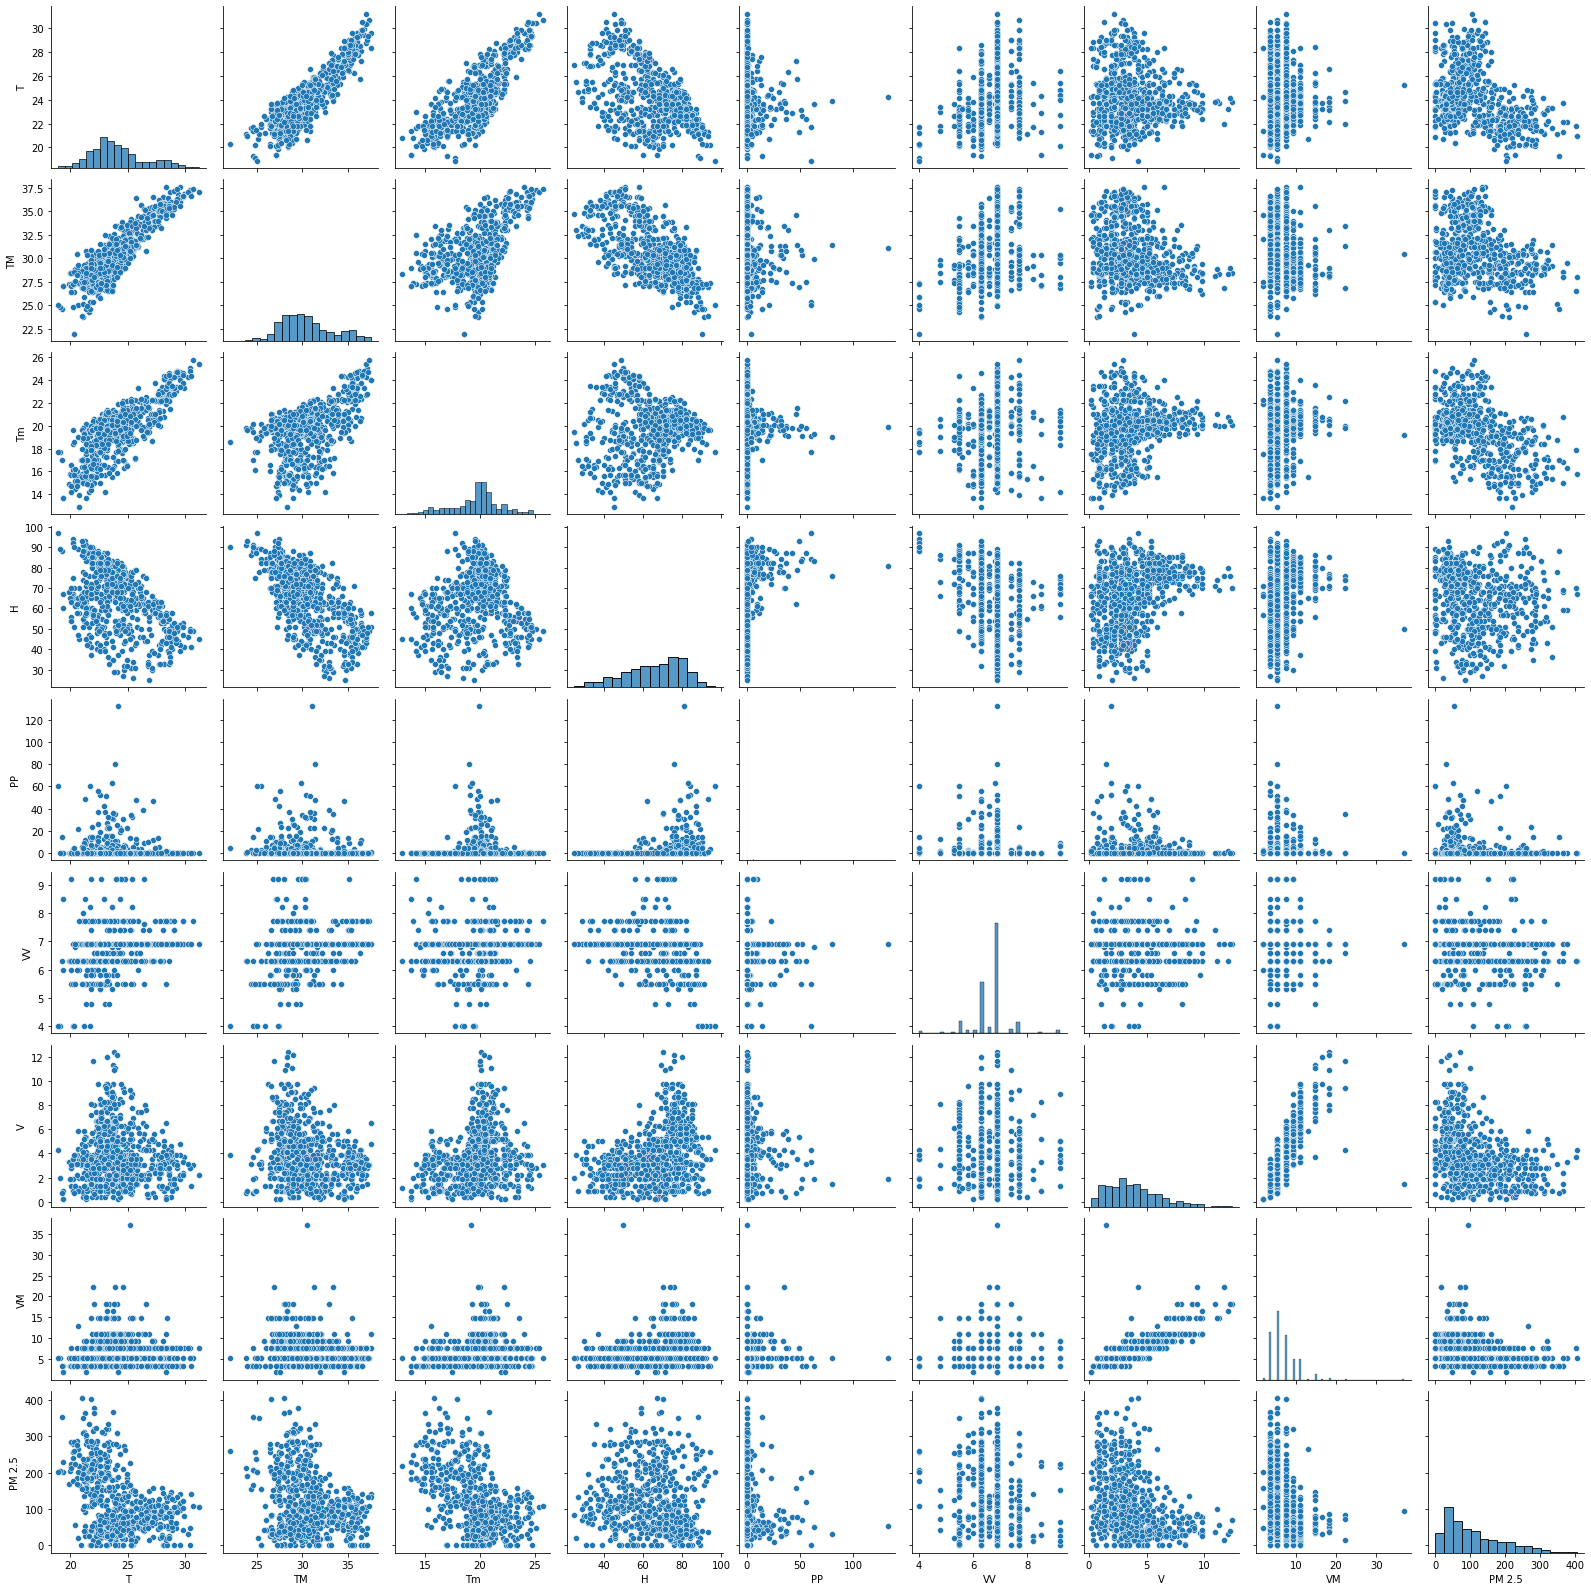

In [11]:
sns.pairplot(df)

# Test train split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [15]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9125404232302623


In [16]:

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.4931239940510931


In [17]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [18]:
score.mean()

0.25400815776843144

Model Evaluation

In [19]:
prediction=regressor.predict(x_test)

E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

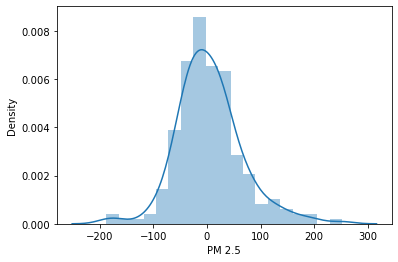

In [20]:
sns.distplot(y_test-prediction)

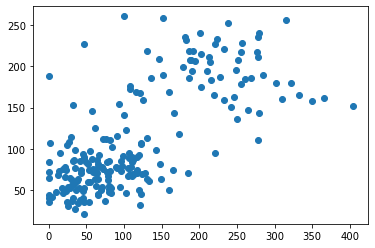

In [21]:
plt.scatter(y_test,prediction)

# Hyperparameter Tuning

In [22]:
RandomForestRegressor()

RandomForestRegressor()

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [26]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 8)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [27]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [29]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [30]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   2.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   2.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=100

[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   2.3s
[CV] END max_depth=10, max_featur

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   3.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   3.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   3.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   3.2s
[CV] END max_depth=10, m

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=700; total time=   1.7s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=700; total time=   1.7s
[CV] END max_depth=35, max_fea

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.9s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.9s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.9s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END max_depth=35, max_features=s

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.7s
[CV] END max_depth=30, max_features=s

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   1.5s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   2.5s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   2.5s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   2.5s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   2.5s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   2.5s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   3.1s
[CV] END max_depth

[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.9s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.8s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.9s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.9s
[CV] END max_depth=35, max_featu

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [32]:
rf_random.best_score_

-3736.1600936214177

In [33]:
predictions=rf_random.predict(x_test)

E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

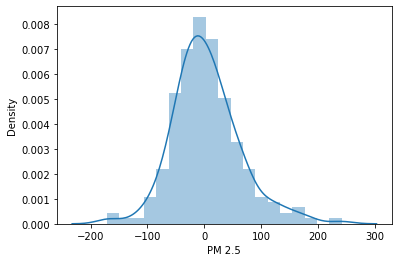

In [34]:
sns.distplot(y_test-predictions)

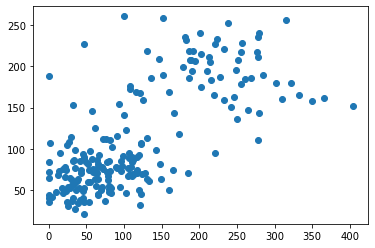

In [35]:

plt.scatter(y_test,prediction)

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 45.76487203791468
MSE: 3858.9874262861526
RMSE: 62.120748758254294


decision tree results
MAE: 58.42290679304897
MSE: 6601.676479726171
RMSE: 81.25070141067197

In [52]:
import pickle

In [53]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)